## Mayank Singh
#### 21, Nov, 2022
# HP Election - 2022

###  Agenda - Understanding and Performing Bivariate and Multivariate Analysis

##### Bivariate Analysis
- Bivariate analysis can be defined as the analysis of bivariate data. It is one of the simplest forms of statistical analysis, which is used to find out if there is a relationship between two sets of values. Usually, it involves the variables X and Y

##### Multivariate Analysis
-  Multivariate analysis involves analyzing multiple variables (more than two) to identify any possible association among them. Key takeaways Multivariate analysis offers a more complete examination of the data by looking at all possible factors.

## Importing Liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data Set

In [2]:
## Ignoring the encoding errors in my case, using "encoding_erros = 'ignore' parameter"
df = pd.read_csv('Himachal_Pradesh_Political_party_candidates.csv', encoding_errors='ignore')

In [3]:
df.head(2)

,Sno,Candidate,Constituency,Party,Criminal Case,Education,Total Assets,Liabilities
0,1,Abhay Kumar Ashok,DHARAMSHALA,IND,0,Post Graduate,"Rs97,40,093\r\n~ 97Lacs+",Rs0\r\n~
1,2,Abhinay Bhardwaj,HAMIRPUR,Rashtriya Devbhumi Party,0,Graduate,"Rs5,42,477\r\n~ 5Lacs+","Rs2,50,000\r\n~ 2Lacs+"


### Performing some Data Cleaning and Transformation task as per requirement

In [4]:
# Converting two major columns of Data set from String/object to int
# 1. Total assests value
# 2. Liabilities value

In [5]:
# .str.replace() is used to remove unwanted characters from the coulmn values so that we get left only with digits to covert 
# the object to int
df['Total Assets'] = df['Total Assets'].str.replace('Rs',"")
df['Total Assets'] = df['Total Assets'].str.replace('\r\n~',"")
df['Total Assets'] = df['Total Assets'].str.replace(',',"")
df['Total Assets']= df['Total Assets'].str.split().str[0]
df['Total Assets'] = df['Total Assets'].str.strip()
df['Total Assets'] = df['Total Assets'].astype(int) # converting object to int

In [6]:
# .str.replace() is used to remove unwanted characters from the coulmn values so that we get left only with digits to covert 
# the object to int
df['Liabilities'] = df['Liabilities'].str.replace('Rs',"")
df['Liabilities'] = df['Liabilities'].str.replace('\r\n~',"")
df['Liabilities'] = df['Liabilities'].str.replace(',',"")
df['Liabilities']= df['Liabilities'].str.split().str[0]
df['Liabilities'] = df['Liabilities'].str.strip()
df['Liabilities'] = df['Liabilities'].astype(int) # converting object to int

In [7]:
df.drop('Sno', axis = 1,inplace = True)

In [8]:
df.sample(5)

,Candidate,Constituency,Party,Criminal Case,Education,Total Assets,Liabilities
400,Vinod Kumar,NACHAN (SC),BJP,0,12th Pass,21409897,2744431
190,Manoj Kumar,JHANDUTA (SC),Rashtriya Devbhumi Party,0,Graduate,1490853,0
307,Ravinder Pal Singh Mann,HAROLI,AAP,0,Graduate Professional,4966314,0
309,Ravinder Singh,JAWALAMUKHI,BJP,1,Graduate,34535958,1415567
81,Desh Raj,NADAUN,BSP,0,10th Pass,2353512,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Candidate      412 non-null    object
 1   Constituency   412 non-null    object
 2   Party          412 non-null    object
 3   Criminal Case  412 non-null    int64 
 4   Education      412 non-null    object
 5   Total Assets   412 non-null    int32 
 6   Liabilities    412 non-null    int32 
dtypes: int32(2), int64(1), object(4)
memory usage: 19.4+ KB


## Starting EDA

### 1. Scatter Plot (Numerical - Numerical)

Bivariate Analysis - We are trying to find a relationship between criminal cases and total assets i.e. as no. of crminal cases are incresing, is amount of total assets owned increasing. -- Result - no such relationship.

Multivariate analysis - we are infusing the party to identify that candidate belongs to which party.

<AxesSubplot:xlabel='Criminal Case', ylabel='Total Assets'>

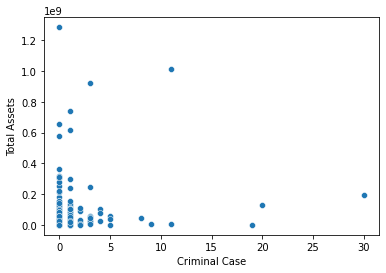

In [10]:
# Bivariate Analysis:
sns.scatterplot(x = df['Criminal Case'],y = df['Total Assets'])

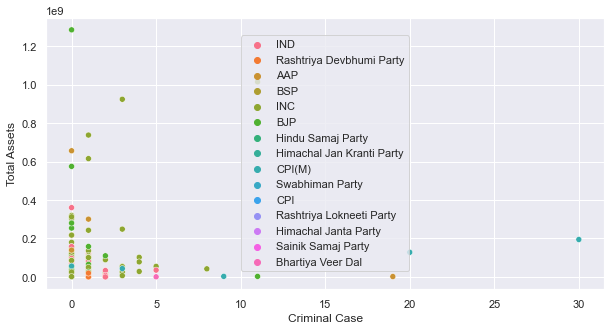

In [19]:
# Multivariate Analysis:
sns.scatterplot(x = df['Criminal Case'],y = df['Total Assets'], hue = df['Party'])
plt.legend(loc='center')
sns.set(rc={"figure.figsize":(10, 5)})

### 2. Bar Plot (Numerical - Categorical)

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

Bivariate Analysis - We are trying to find a relationship between criminal cases and Education. The Barplot says on an average Docrate candidates have high records of criminal cases. Ironically, the more qualified you are, it is possible you will commit more crime.

Multivariate analysis - we are infusing the party to identify that candidate belongs to which party. And the plot depicts that CPI(M) tops it in Doctrate category.

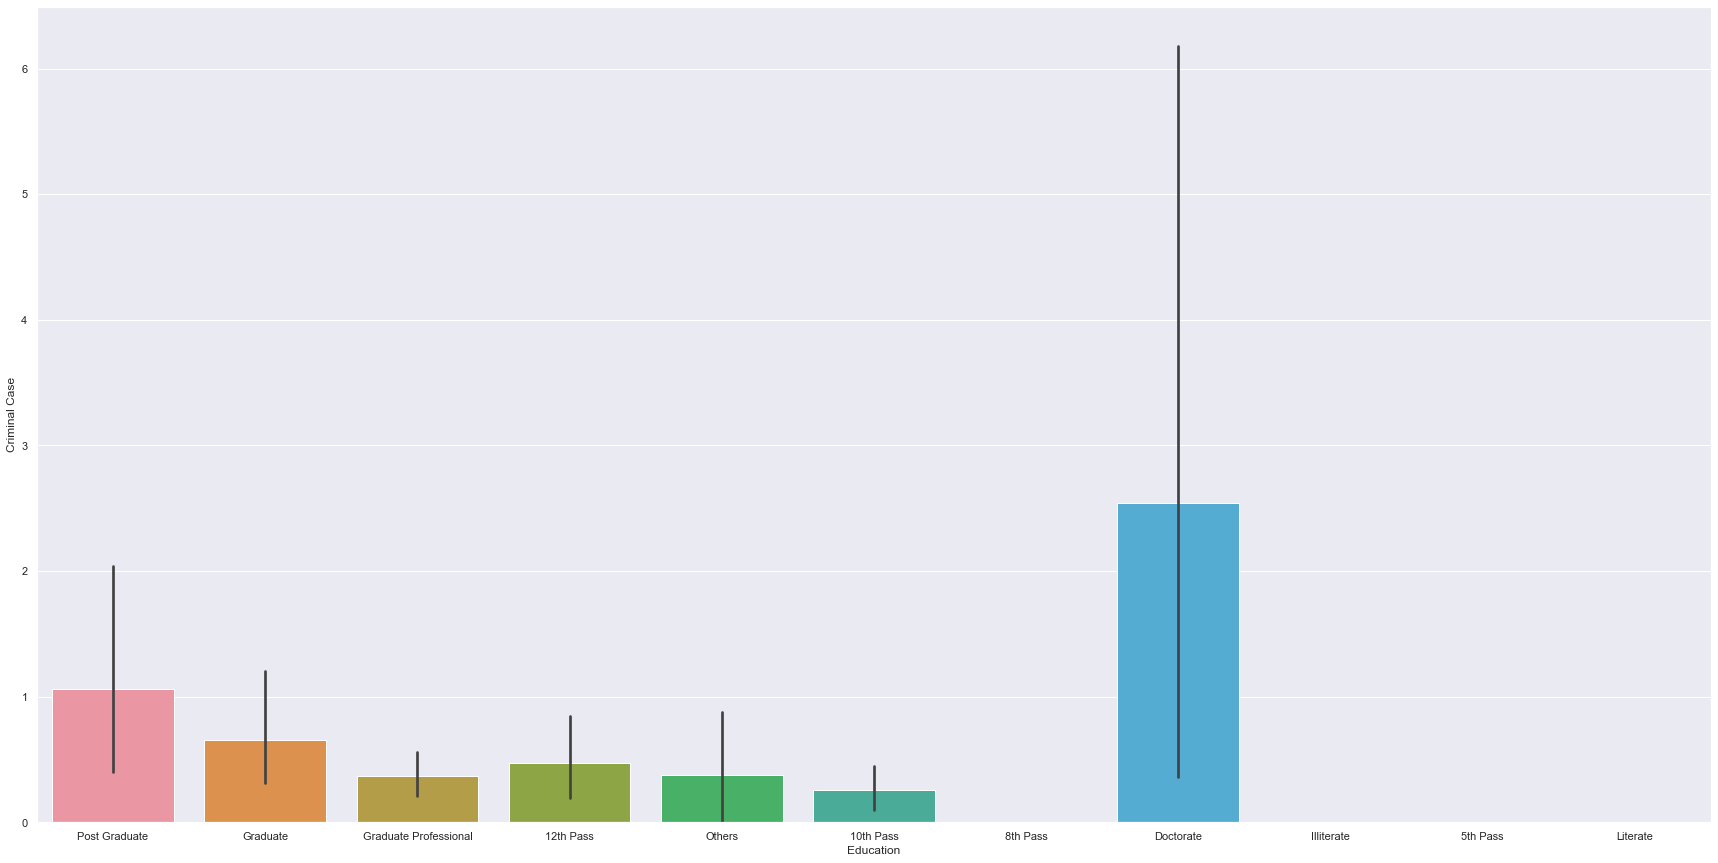

In [18]:
#Bivariate Analysis
sns.barplot(x = df['Education'], y = df['Criminal Case'])
sns.set(rc={"figure.figsize":(10, 5)})

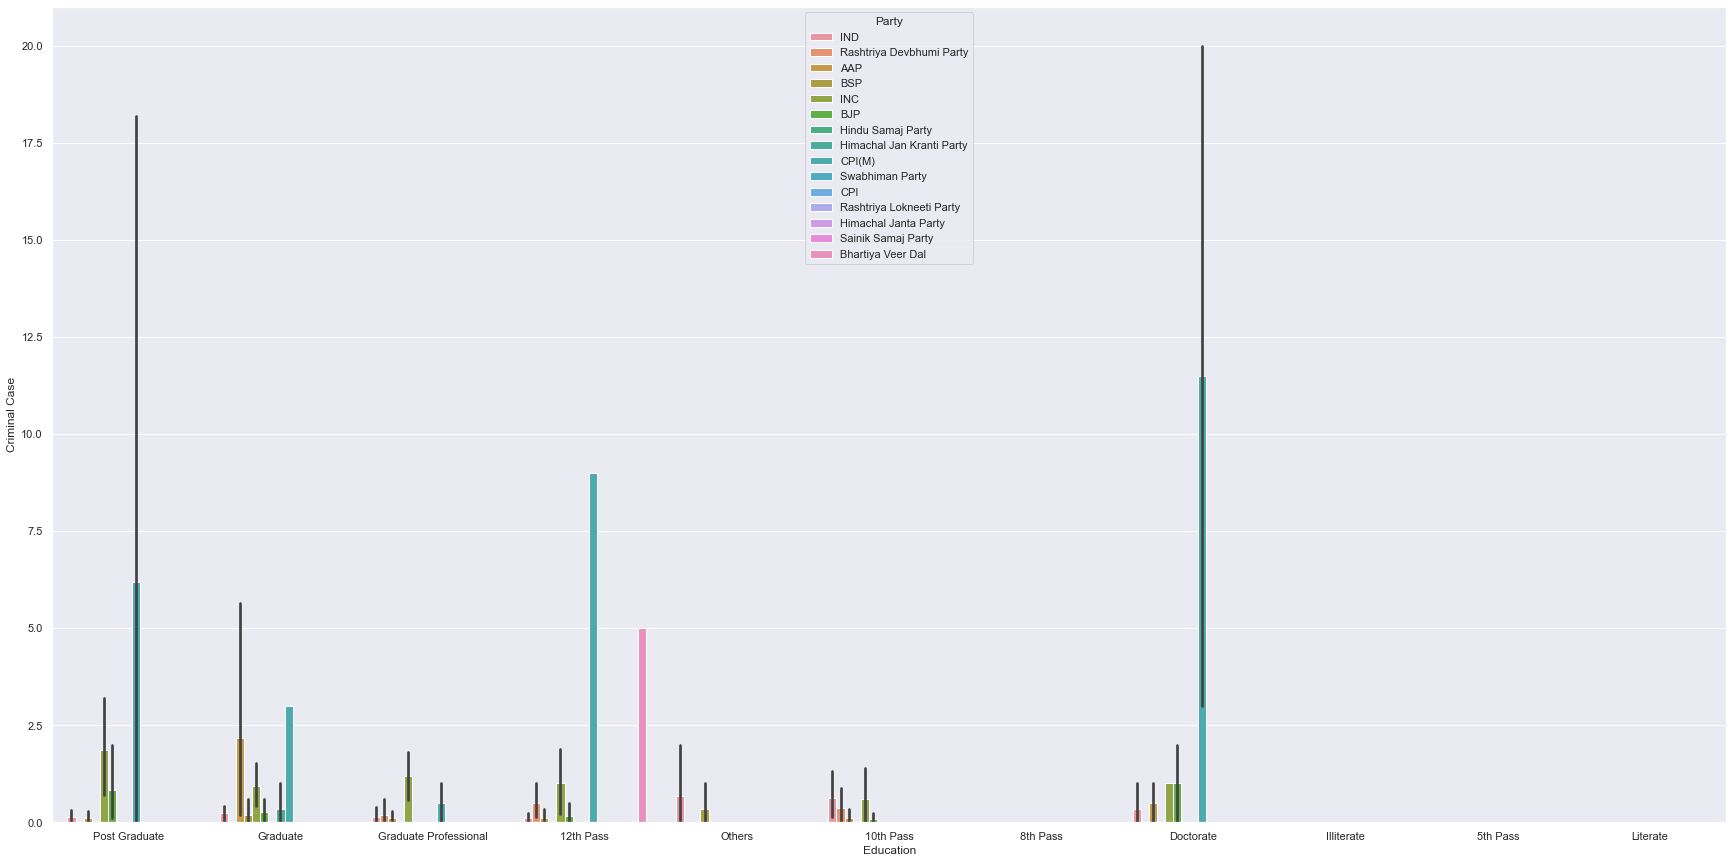

In [17]:
# Multivariate Analysis
sns.barplot(x = df['Education'], y = df['Criminal Case'], hue = df['Party'])
sns.set(rc={"figure.figsize":(30, 15)})

### 3. Box Plot (Numerical - Categorical)

The seaborn boxplot is a very basic plot Boxplots are used to visualize distributions. Thats very useful when you want to compare data between two groups. Sometimes a boxplot is named a box-and-whisker plot. Any box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

<AxesSubplot:xlabel='Education', ylabel='Criminal Case'>

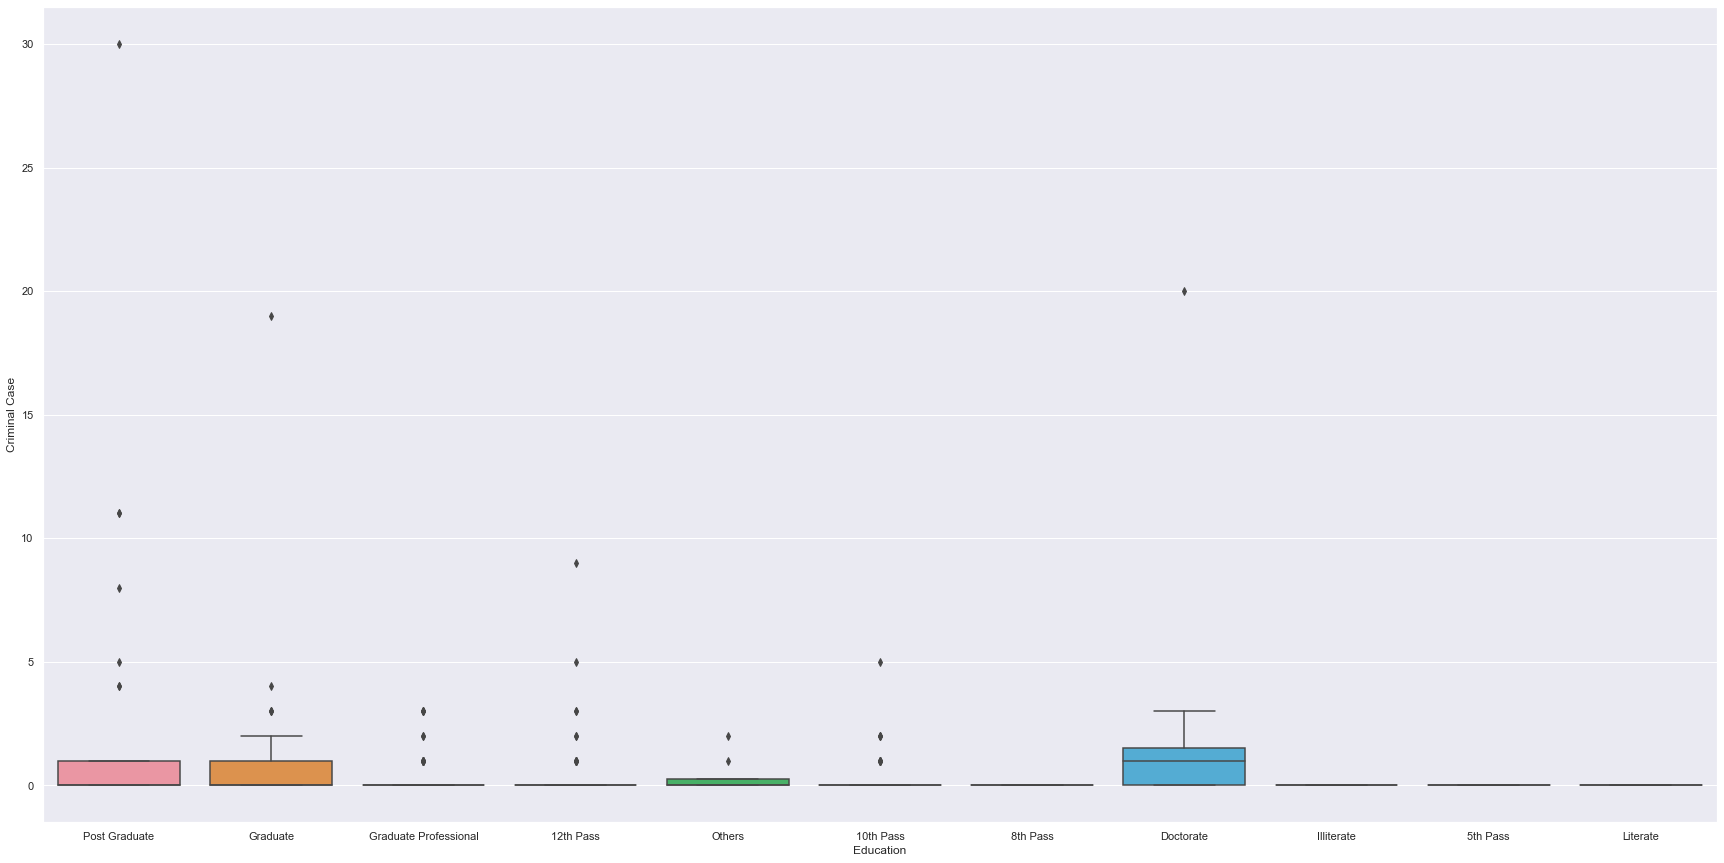

In [14]:
# Bivariate Analysis
sns.boxplot(x = df['Education'], y = df['Criminal Case'])

<AxesSubplot:xlabel='Education', ylabel='Criminal Case'>

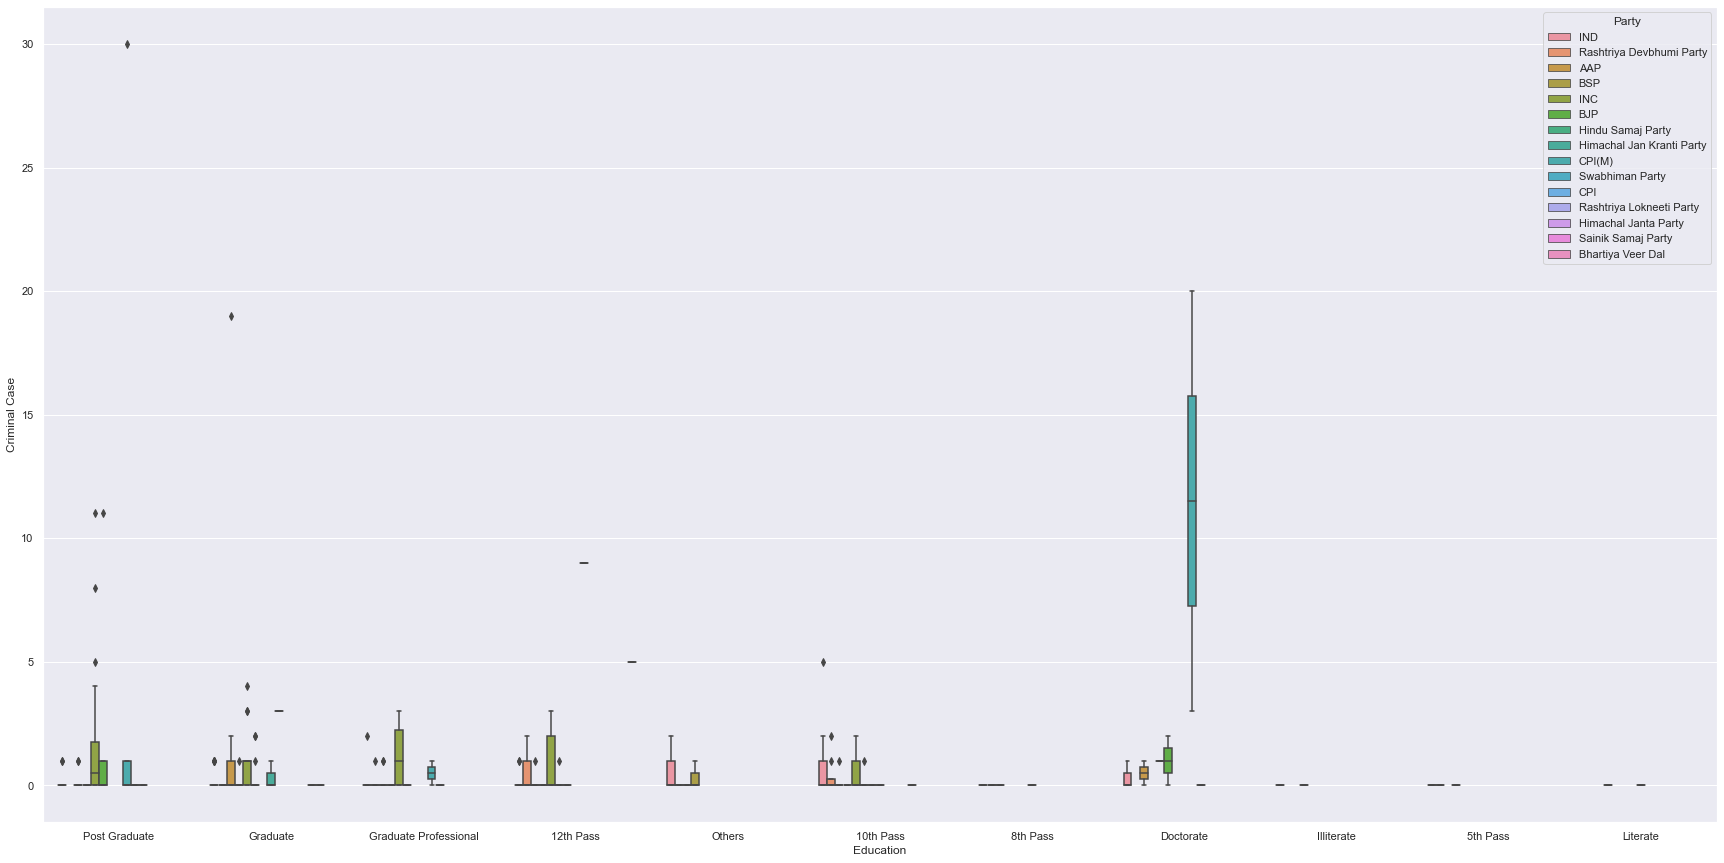

In [15]:
# Multivariate Analysis
sns.boxplot(x = df['Education'], y = df['Criminal Case'], hue = df['Party'])

### 4. Distplot (Numerical - Categorical)

In [ ]:
## Since we do not have any categorical column available in form of float/int data type,
## we can not plot distplot to do Bivariate/Mutivariate anlaysis.
## Still to understand how to plot and its look we have plotted as distplot with both numerical column.

C:\Users\mayank.singh27\AppData\Local\Temp\ipykernel_44348\918789814.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Criminal Case']>=5]['Total Assets'], hist = False)
C:\Users\mayank.singh27\AppData\Local\Temp\ipykernel_44348\918789814.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

<AxesSubplot:xlabel='Total Assets', ylabel='Density'>

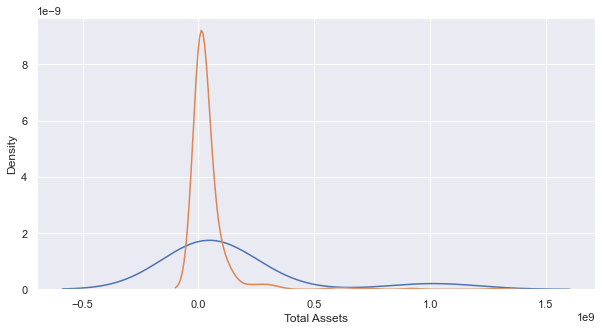

In [28]:
sns.distplot(df[df['Criminal Case']>=5]['Total Assets'], hist = False)
sns.distplot(df[df['Criminal Case']<=5]['Total Assets'], hist = False)

### 5. Heatmap (Categorical - Categorical)

Heat Map helps to analyse two categorical columns with the help of colours. And what the colour is depicting can be understood with the help of colour bar on the right of graph. generally light colours indicate higher numbers.

In [29]:
df.head(2)

,Candidate,Constituency,Party,Criminal Case,Education,Total Assets,Liabilities
0,Abhay Kumar Ashok,DHARAMSHALA,IND,0,Post Graduate,9740093,0
1,Abhinay Bhardwaj,HAMIRPUR,Rashtriya Devbhumi Party,0,Graduate,542477,250000


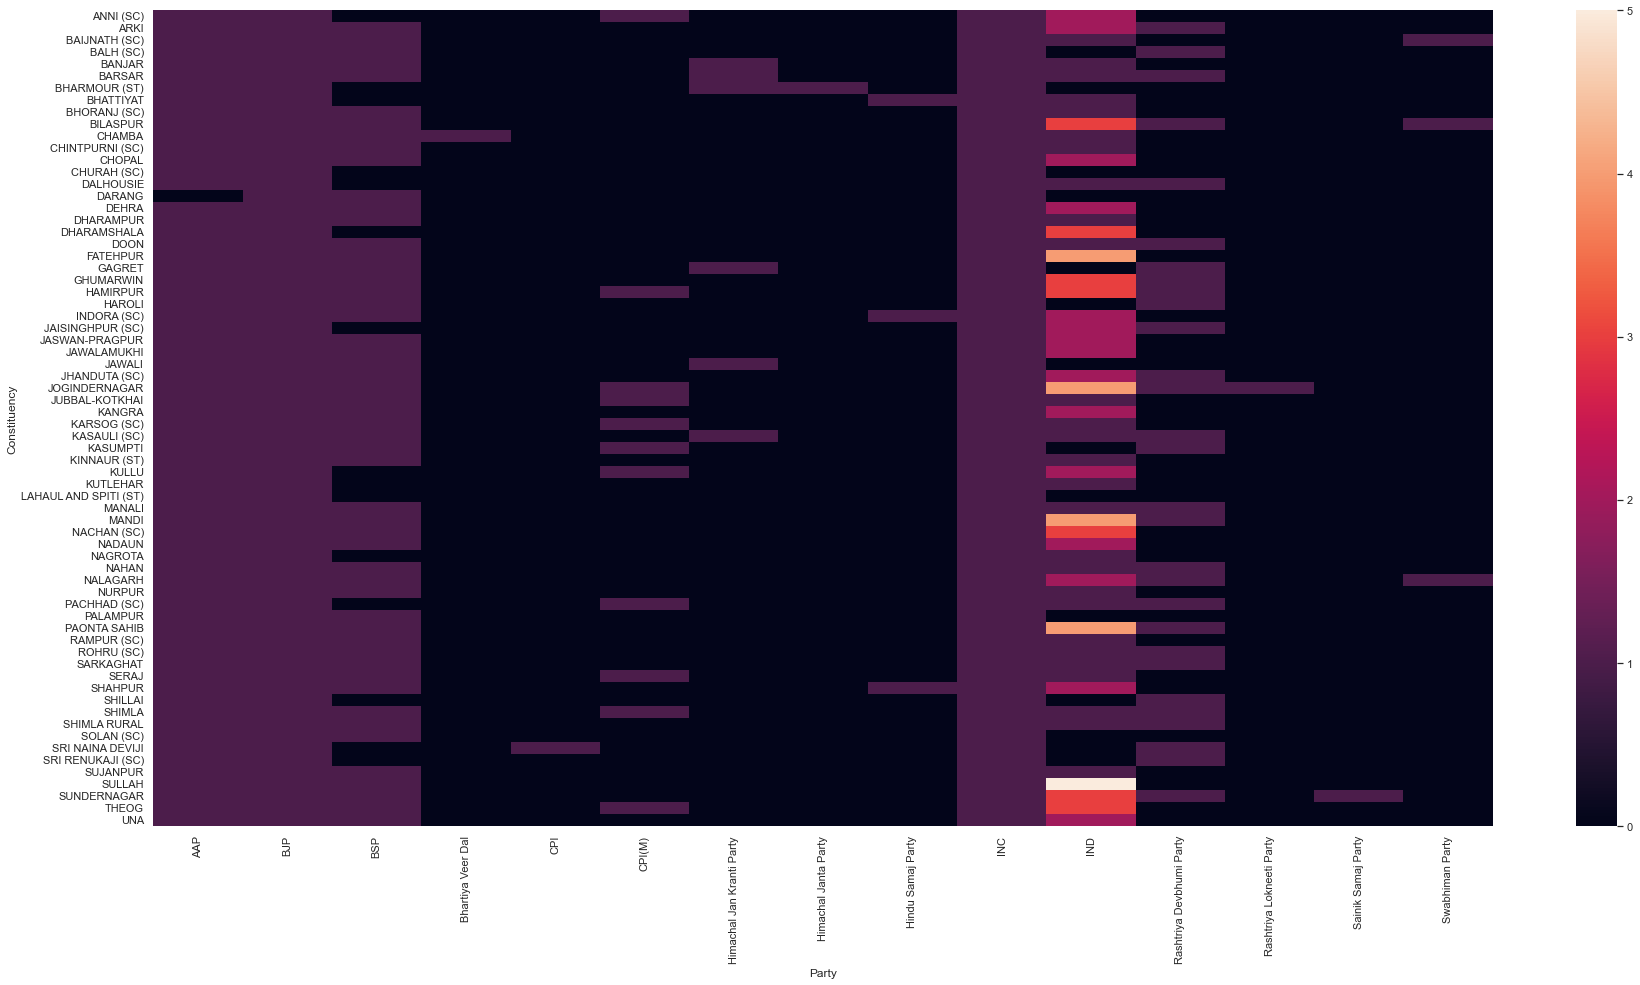

In [33]:
sns.heatmap(pd.crosstab(df['Constituency'], df['Party']))
sns.set(rc={"figure.figsize":(30, 15)})

From the above heatmap and given beolw figures, we can findout which constituency has more no. of canddates from a party. Lighter colour shows more no. of candidates of a prty. For eg. from the SULLAH constituency IND has 5 members. Validate it from Heatmap as well as from below table

In [35]:
pd.crosstab(df['Constituency'], df['Party'])

Party,AAP,BJP,BSP,Bhartiya Veer Dal,CPI,CPI(M),Himachal Jan Kranti Party,Himachal Janta Party,Hindu Samaj Party,INC,IND,Rashtriya Devbhumi Party,Rashtriya Lokneeti Party,Sainik Samaj Party,Swabhiman Party
Constituency,,,,,,,,,,,,,,,
ANNI (SC),1,1,0,0,0,1,0,0,0,1,2,0,0,0,0
ARKI,1,1,1,0,0,0,0,0,0,1,2,1,0,0,0
BAIJNATH (SC),1,1,1,0,0,0,0,0,0,1,1,0,0,0,1
BALH (SC),1,1,1,0,0,0,0,0,0,1,0,1,0,0,0
BANJAR,1,1,1,0,0,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUJANPUR,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0
SULLAH,1,1,1,0,0,0,0,0,0,1,5,0,0,0,0
SUNDERNAGAR,1,1,1,0,0,0,0,0,0,1,3,1,0,1,0


### 6. Clustermap (Categorical - Categorical)

Plot a matrix dataset as a hierarchically-clustered heatmap. It is simillar to heatmap with a difference of presence of Dandograms that depicts the relationship bewteen different categories 

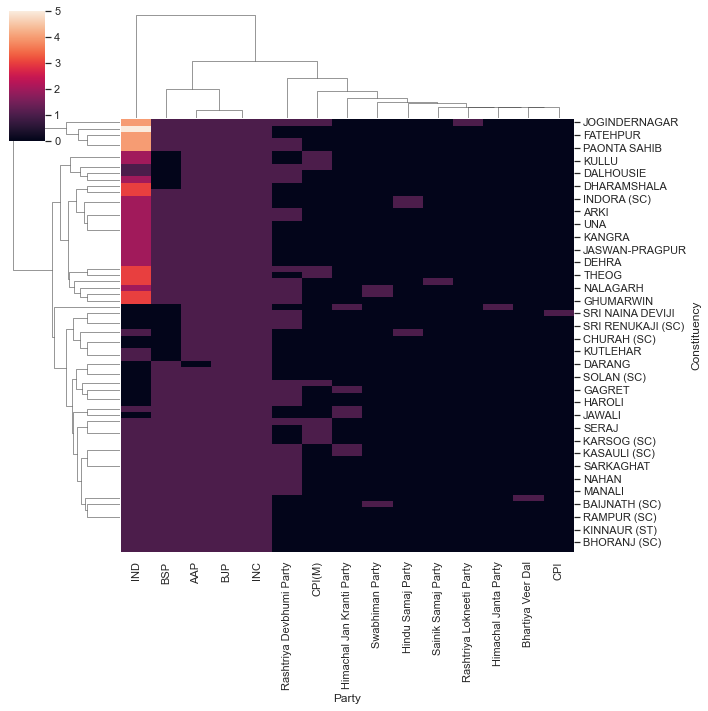

In [36]:
sns.clustermap(pd.crosstab(df['Constituency'], df['Party']))
sns.set(rc={"figure.figsize":(30, 15)})

### 6. Pairplot

When we want to plot multiple scatter plot between Numerical columns of our data set, use pair plot. It provides all graphs showing relationship betwwen all numerical columns with each other

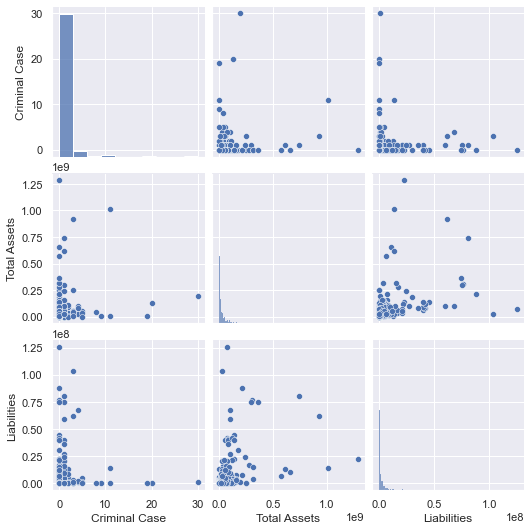

In [37]:
# Bivariate Analysis
sns.pairplot(df)

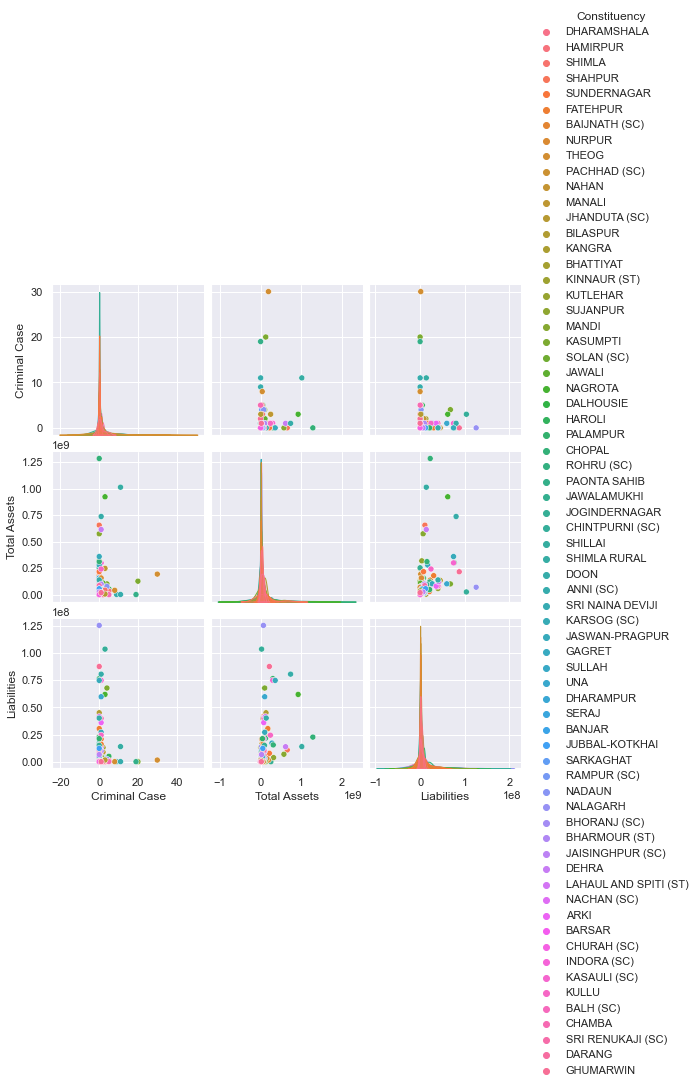

In [41]:
# Mutivariate Analysis
sns.pairplot(df, hue = 'Constituency')

### 8. Lineplot (Numerical - Numerical)

Line plot should be plotted in case there is a column of time based - month, date, year/s etc. to understand the relationship across a timeline.

##### Since we do not have time value in our data set we are not plotting it.